# Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# libraries to do statistical analysis
import math
from scipy.stats import *

# libraries used to pre-process
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# libraries used to implement models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# libraries to evaluate performance
import sklearn.metrics as metrics
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

# to set max column display
pd.pandas.set_option('display.max_columns',None)

import shap

# Data Loading

In [ ]:
df=pd.read_csv('Airline_Delay_Cause.csv')

In [ ]:
df.shape

(179338, 21)

In [ ]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,0.73,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,1.00,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,1.06,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,0.00,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,52.43,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179338 entries, 0 to 179337
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 179338 non-null  int64  
 1   month                179338 non-null  int64  
 2   carrier              179338 non-null  object 
 3   carrier_name         179338 non-null  object 
 4   airport              179338 non-null  object 
 5   airport_name         179338 non-null  object 
 6   arr_flights          178997 non-null  float64
 7   arr_del15            178747 non-null  float64
 8   carrier_ct           178997 non-null  float64
 9   weather_ct           178997 non-null  float64
 10  nas_ct               178997 non-null  float64
 11  security_ct          178997 non-null  float64
 12  late_aircraft_ct     178997 non-null  float64
 13  arr_cancelled        178997 non-null  float64
 14  arr_diverted         178997 non-null  float64
 15  arr_delay        

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
year,179338.0,2019.480082,2.410204,2015.0,2018.00,2020.00,2022.00,2023.00
month,179338.0,6.485725,3.463516,1.0,3.00,6.00,9.00,12.00
arr_flights,178997.0,327.816969,931.001446,1.0,41.00,89.00,218.00,21977.00
arr_del15,178747.0,58.709086,164.378035,0.0,6.00,15.00,40.00,4176.00
carrier_ct,178997.0,18.572643,47.389651,0.0,1.96,5.40,14.70,1293.91
weather_ct,178997.0,2.035742,6.894812,0.0,0.00,0.22,1.62,266.42
nas_ct,178997.0,17.094929,56.279604,0.0,1.00,3.30,9.86,1884.42
security_ct,178997.0,0.145307,0.702149,0.0,0.00,0.00,0.00,58.69
late_aircraft_ct,178997.0,20.778477,64.912766,0.0,1.00,4.29,13.01,2069.07
arr_cancelled,178997.0,6.830103,41.446756,0.0,0.00,1.00,3.00,4951.00


# . Data Cleaning & Preprocessing

In [ ]:
#check for any duplicates
len(df[df.duplicated()])

0

In [ ]:
# Checking the sum of null values in columns from a dataset
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [ ]:
def fill_na_with_median(df):
    return df.fillna(df.median(numeric_only=True))

In [ ]:
df=fill_na_with_median(df)

In [ ]:
# Checking the sum of null values in columns from a dataset
df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [ ]:
# print the unique value
df.nunique()

year                       9
month                     12
carrier                   29
carrier_name              39
airport                  396
airport_name             420
arr_flights             5460
arr_del15               1692
carrier_ct             14204
weather_ct              3921
nas_ct                 14165
security_ct              868
late_aircraft_ct       15566
arr_cancelled            567
arr_diverted             112
arr_delay              20865
carrier_delay          11969
weather_delay           4333
nas_delay               9747
security_delay           577
late_aircraft_delay    13221
dtype: int64

In [ ]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [ ]:
initial_num_var=[ 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct','security_ct',
        'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay','security_delay', 'late_aircraft_delay']

In [ ]:
df = df.drop(['carrier_name', 'airport_name','year'], axis=1)

In [ ]:
df=df[df['airport']!='YNG']

In [ ]:
# Make a copy to preserve the original DataFrame
df_per_flight = df.copy()


# Normalize ALL numerical columns by 'arr_flights' (including 'arr_flights' itself) and round to 2 decimals
for col in initial_num_var:
    df_per_flight[col] = np.where(df_per_flight['arr_flights'] != 0,
                                  df_per_flight[col] / df_per_flight['arr_flights'],
                                  0).round(2)
# Now set 'arr_flights' to 1
df_per_flight['arr_flights'] = 1.0

In [ ]:
# Assuming your dataframe is named 'df'
df_per_flight['is_delayed'] = df_per_flight['arr_delay'].apply(lambda x: 1 if x > 15 else 0)

# EDA (Exploratory Data Analysis)

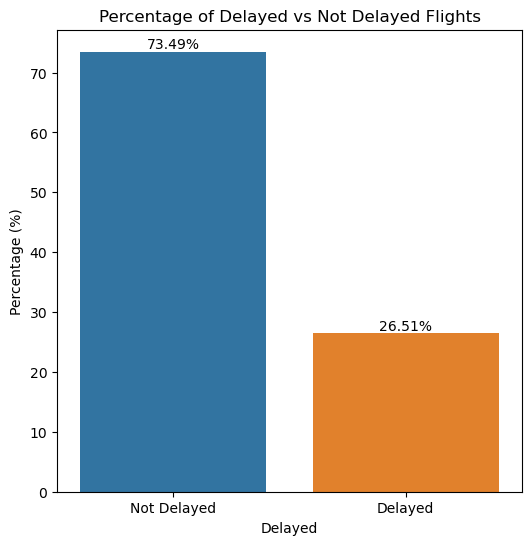

In [ ]:
plt.figure(figsize=(6,6))

# Calculate percentages
percentage = df_per_flight['is_delayed'].value_counts(normalize=True) * 100

# Create a bar plot using the percentages
ax = sns.barplot(x=percentage.index, y=percentage.values)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%')

# Fix the x-axis tick labels
plt.xticks(ticks=[0, 1], labels=["Not Delayed", "Delayed"])

plt.xlabel("Delayed")
plt.ylabel("Percentage (%)")
plt.title("Percentage of Delayed vs Not Delayed Flights")
plt.show()

•	Data is imbalanced with 26.5 % delayed flight.

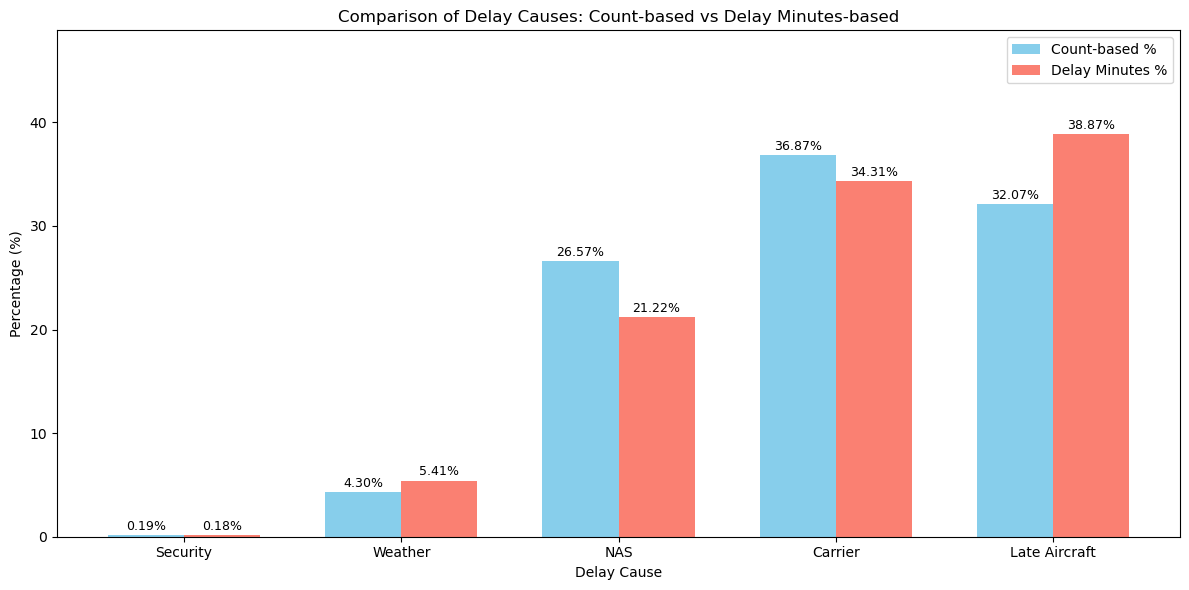

In [ ]:
delay_causes_ct = ['security_ct', 'weather_ct', 'nas_ct', 'carrier_ct', 'late_aircraft_ct']
delay_causes_val = ['security_delay', 'weather_delay', 'nas_delay', 'carrier_delay', 'late_aircraft_delay']

# Counts
delay_counts = [df_per_flight[dc].sum() for dc in delay_causes_ct]
total_delays_ct = sum(delay_counts)
delay_percentages_ct = [(count / total_delays_ct) * 100 for count in delay_counts]

# Values (Minutes)
delay_vals = [df[dc].sum() for dc in delay_causes_val]
total_delays_val = sum(delay_vals)
delay_percentages_val = [(val / total_delays_val) * 100 for val in delay_vals]

# Bar Plot - Side by Side
x = np.arange(len(delay_causes_ct))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(12,6))
bar1 = plt.bar(x - width/2, delay_percentages_ct, width, label='Count-based %', color='skyblue')
bar2 = plt.bar(x + width/2, delay_percentages_val, width, label='Delay Minutes %', color='salmon')

# Labels & Title
plt.xlabel('Delay Cause')
plt.ylabel('Percentage (%)')
plt.title('Comparison of Delay Causes: Count-based vs Delay Minutes-based')
plt.xticks(x, ['Security', 'Weather', 'NAS', 'Carrier', 'Late Aircraft'])
plt.legend()

# Adding percentage labels
for i in range(len(x)):
    plt.text(x[i] - width/2, delay_percentages_ct[i] + 0.5, f"{delay_percentages_ct[i]:.2f}%", ha='center', fontsize=9)
    plt.text(x[i] + width/2, delay_percentages_val[i] + 0.5, f"{delay_percentages_val[i]:.2f}%", ha='center', fontsize=9)

plt.ylim(0, max(max(delay_percentages_ct), max(delay_percentages_val)) + 10)  # y-limit for better headroom
plt.tight_layout()
plt.show()


•	Late Aircraft and Carrier Delays are the dominant contributors both in count and delay minutes, suggesting a focus area for operational improvements, while security delay contribution is negligible . So we drop ‘security_ct’ and ‘security_delay’ variables.

In [ ]:
df_per_flight.drop(['arr_flights','security_ct','security_delay'], axis=1,inplace =True)


In [ ]:
df_per_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179337 entries, 0 to 179337
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                179337 non-null  int64  
 1   carrier              179337 non-null  object 
 2   airport              179337 non-null  object 
 3   arr_del15            179337 non-null  float64
 4   carrier_ct           179337 non-null  float64
 5   weather_ct           179337 non-null  float64
 6   nas_ct               179337 non-null  float64
 7   late_aircraft_ct     179337 non-null  float64
 8   arr_cancelled        179337 non-null  float64
 9   arr_diverted         179337 non-null  float64
 10  arr_delay            179337 non-null  float64
 11  carrier_delay        179337 non-null  float64
 12  weather_delay        179337 non-null  float64
 13  nas_delay            179337 non-null  float64
 14  late_aircraft_delay  179337 non-null  float64
 15  is_delayed       

In [ ]:
# df=df[df['airport']!='YNG']

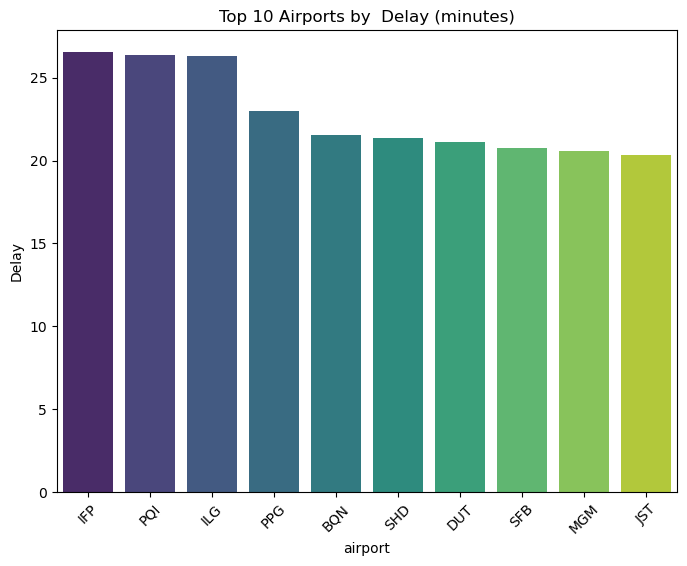

In [ ]:
airport_delay = df_per_flight.groupby('airport')['arr_delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=airport_delay.index, y=airport_delay.values, palette='viridis')
plt.title('Top 10 Airports by  Delay (minutes)')
plt.ylabel('Delay')
plt.xticks(rotation=45)
plt.show()


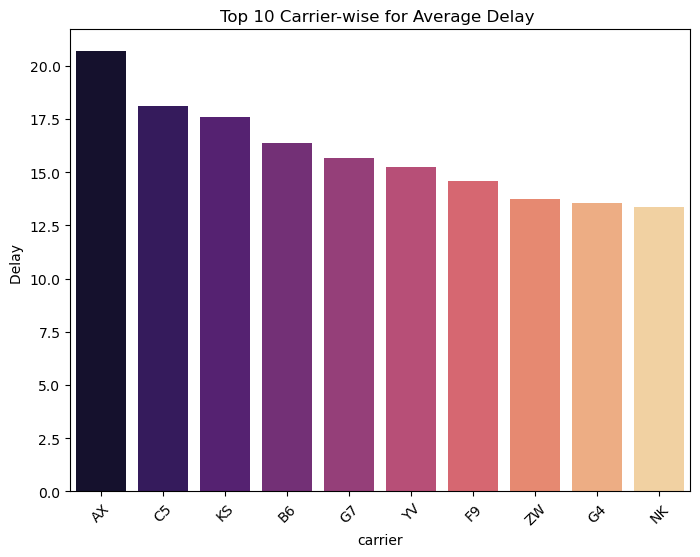

In [ ]:
carrier_delay = df_per_flight.groupby('carrier')['arr_delay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=carrier_delay.index, y=carrier_delay.values, palette='magma')
plt.title('Top 10 Carrier-wise for Average Delay ')
plt.ylabel('Delay ')
plt.xticks(rotation=45)
plt.show()


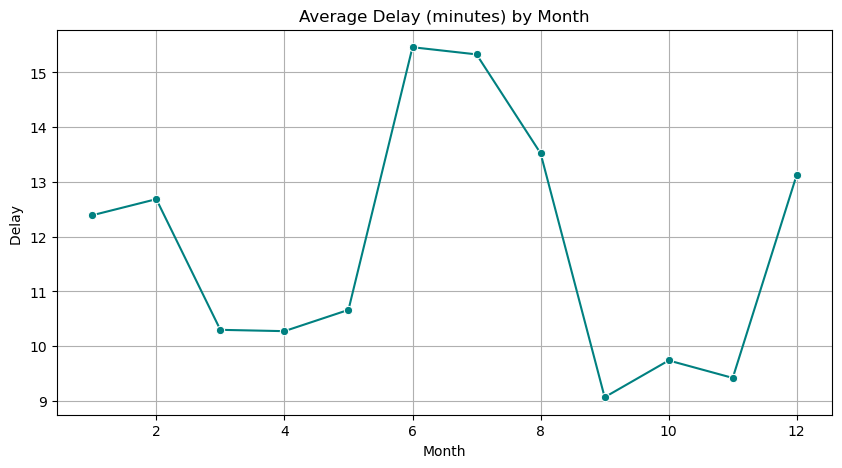

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average delay ratio per month
monthly_avg_delay = df_per_flight.groupby('month')['arr_delay'].mean()

# Plotting
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg_delay.index, y=monthly_avg_delay.values, marker='o', color='teal')
plt.title('Average Delay (minutes) by Month')
plt.xlabel('Month')
plt.ylabel('Delay ')
plt.grid(True)
plt.show()


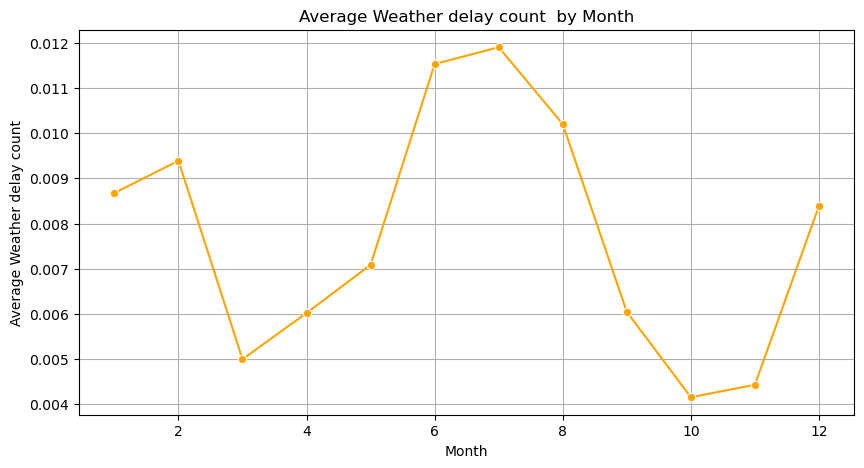

In [ ]:
# Calculate average weather delay count per month
monthly_avg_weather = df_per_flight.groupby('month')['weather_ct'].mean()

# Plotting
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg_weather.index, y=monthly_avg_weather.values, marker='o', color='orange')
plt.title('Average Weather delay count  by Month')
plt.xlabel('Month')
plt.ylabel('Average Weather delay count')
plt.grid(True)
plt.show()


•	“June” and “July” experience more weather-related delays due to thunderstorms, monsoons, and heatwaves. These weather disruptions significantly contribute to overall flight delays during this peak travel season."
•	Top Delayed Airports: Airports like IFP, PQI, ILG experience the highest average delays, indicating potential operational or weather-related challenges at these locations.
•	Carrier Delays: Airlines such as AX, C5, KS have higher average delays compared to others, suggesting either operational inefficiencies or coverage of delay-prone routes


In [ ]:
num_var=[ 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
        'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'late_aircraft_delay']
cat_var=[ 'month', 'carrier',  'airport']

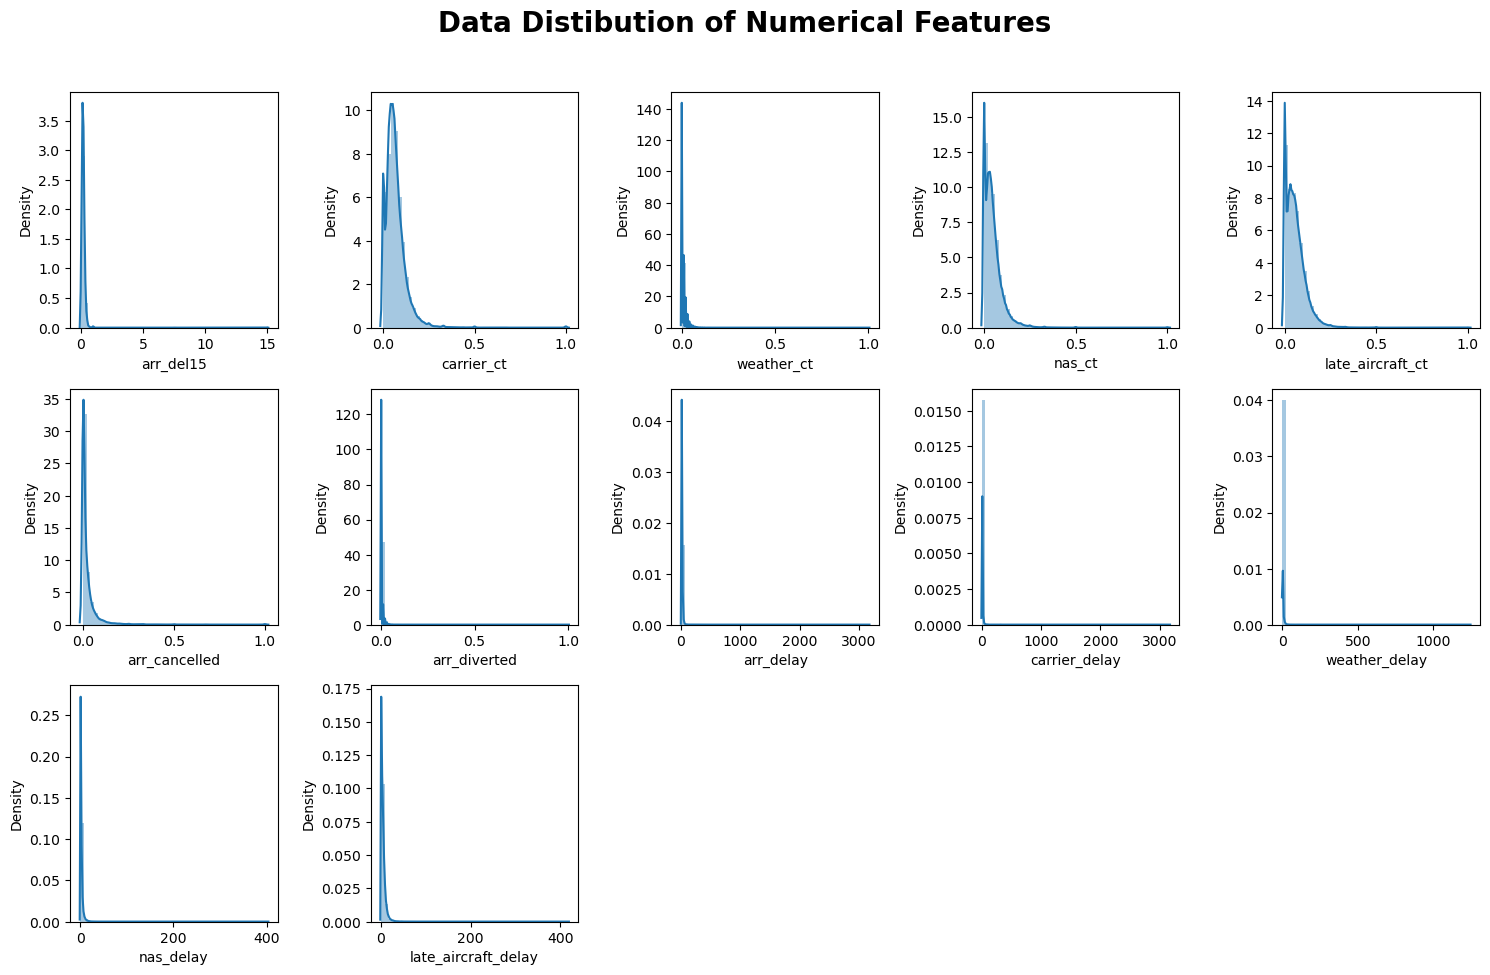

In [ ]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_var):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(df_per_flight[col])
  # x-axis labe
  plt.xlabel(col)
  plt.tight_layout()

•	For numerical features, the majority of distributions are right-skewed.. It demonstrates that these columns have many outliers.

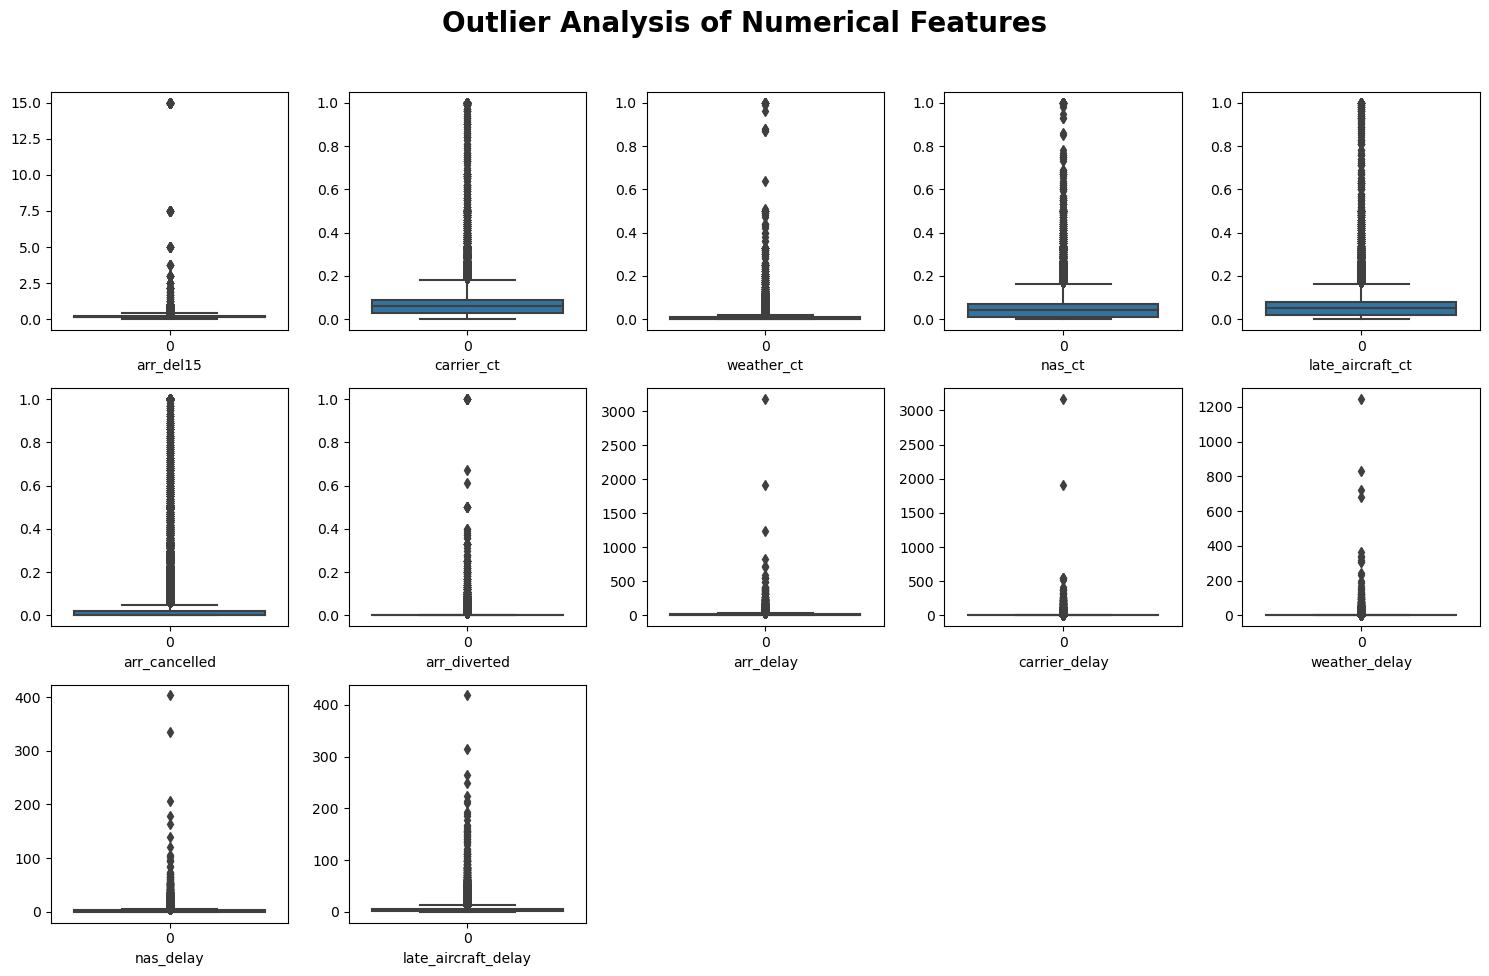

In [ ]:
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_var):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(df_per_flight[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

# Treating Outliers

In [ ]:
# we are going to replace the datapoints with upper and lower bound of all the outliers

def clip_outliers(df):
    for col in df[num_var]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [ ]:

# using the function to treat outliers
df_per_flight = clip_outliers(df_per_flight)

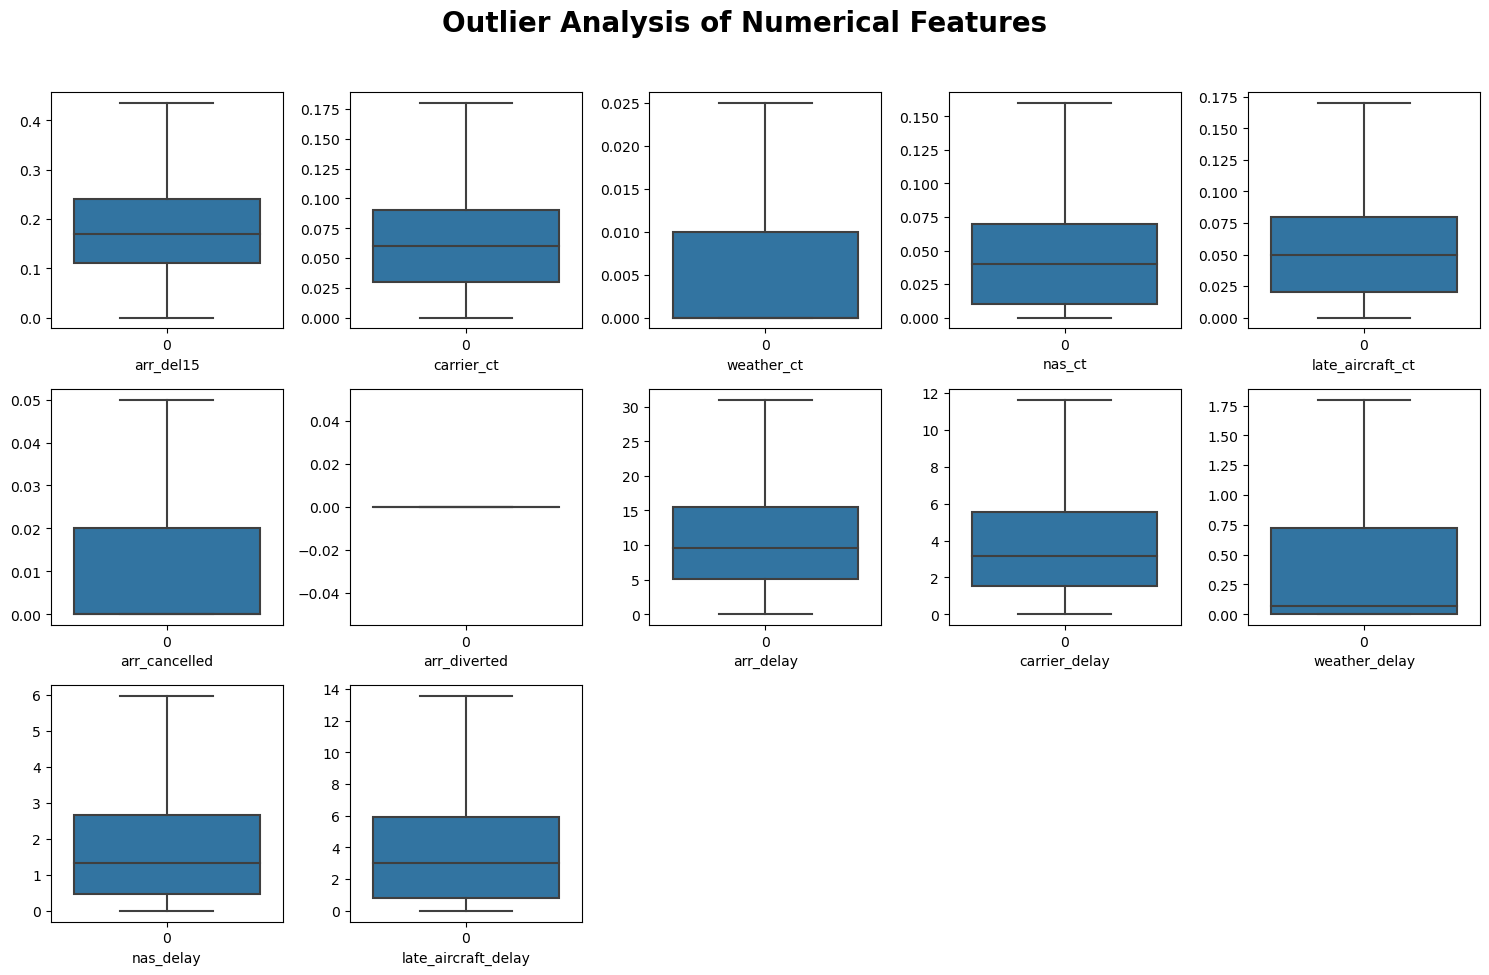

In [ ]:
plt.figure(figsize=(15,12))
# title
plt.suptitle('Outlier Analysis of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_var):
  plt.subplot(4, 5, i+1)            # subplot of 4 rows and 5 columns

  # countplot
  sns.boxplot(df_per_flight[col])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()

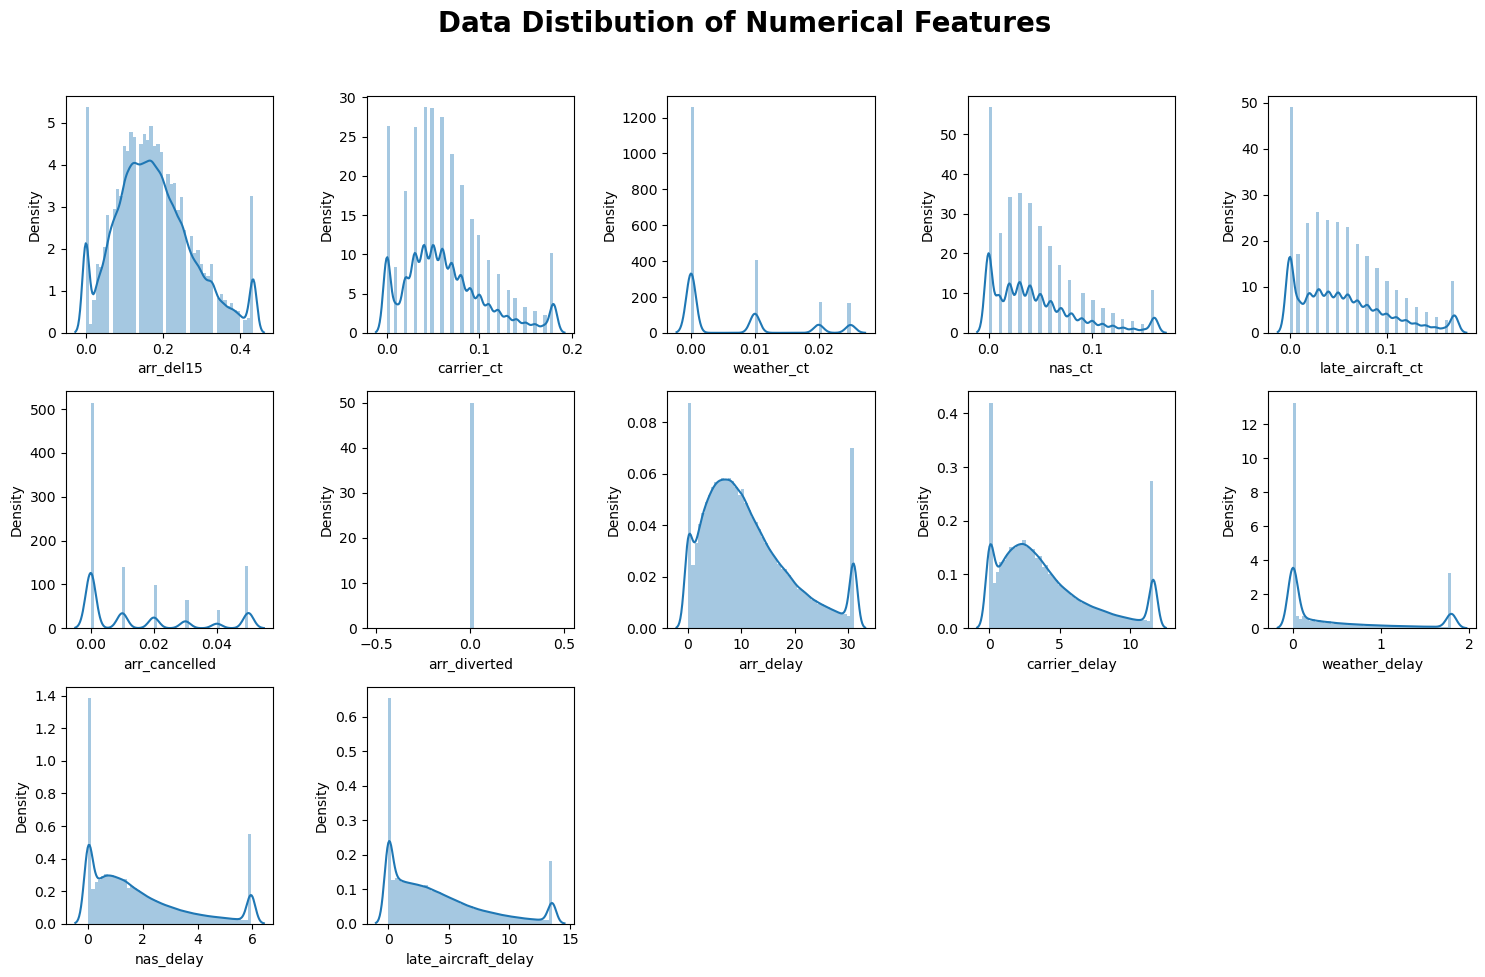

In [ ]:
# figsize
plt.figure(figsize=(15,12))
# title
plt.suptitle('Data Distibution of Numerical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(num_var):
  plt.subplot(4, 5, i+1)                       # subplots 4 rows, 5 columns

  # dist plots
  sns.distplot(df_per_flight[col])
  # x-axis labe
  plt.xlabel(col)
  plt.tight_layout()

•	Most  of the variables can get a normal distribution when outliers are handled by Clipping Method.

•	Apply Frequency encoding for ‘airport’ and ‘carrier’ variables as it  reduces the dimensionality of high-cardinality categorical variables like ‘airport’ and ‘carrier’, making the data more model-friendly, improving computation speed, and preventing overfitting compared to one-hot encoding.Now new variables are ‘airport_freq’ and ‘carrier_freq’ and drop the old columns.

In [ ]:
# Frequency Encoding Function
def frequency_encode(df, col):
    freq_encoding = df[col].value_counts().to_dict()
    return df[col].map(freq_encoding)


# Apply Frequency Encoding
for col in ['airport', 'carrier']:
    df_per_flight[col + '_freq'] = frequency_encode(df_per_flight, col)

# Drop original high-cardinality categorical columns
df_per_flight.drop(['airport', 'carrier'], axis=1, inplace=True)

In [ ]:
df_per_flight.describe().T

,count,mean,std,min,25%,50%,75%,max
month,179337.0,6.485756,3.463501,1.0,3.00,6.00,9.00,12.000
arr_del15,179337.0,0.177413,0.101695,0.0,0.11,0.17,0.24,0.435
carrier_ct,179337.0,0.063107,0.044764,0.0,0.03,0.06,0.09,0.180
weather_ct,179337.0,0.005810,0.008521,0.0,0.00,0.00,0.01,0.025
nas_ct,179337.0,0.045362,0.041100,0.0,0.01,0.04,0.07,0.160
late_aircraft_ct,179337.0,0.055302,0.046110,0.0,0.02,0.05,0.08,0.170
arr_cancelled,179337.0,0.014020,0.018285,0.0,0.00,0.00,0.02,0.050
arr_diverted,179337.0,0.000000,0.000000,0.0,0.00,0.00,0.00,0.000
arr_delay,179337.0,11.140682,7.985630,0.0,5.15,9.53,15.50,31.025
carrier_delay,179337.0,3.953653,3.254767,0.0,1.52,3.15,5.57,11.645


In [ ]:
df_per_flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179337 entries, 0 to 179337
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                179337 non-null  int64  
 1   arr_del15            179337 non-null  float64
 2   carrier_ct           179337 non-null  float64
 3   weather_ct           179337 non-null  float64
 4   nas_ct               179337 non-null  float64
 5   late_aircraft_ct     179337 non-null  float64
 6   arr_cancelled        179337 non-null  float64
 7   arr_diverted         179337 non-null  float64
 8   arr_delay            179337 non-null  float64
 9   carrier_delay        179337 non-null  float64
 10  weather_delay        179337 non-null  float64
 11  nas_delay            179337 non-null  float64
 12  late_aircraft_delay  179337 non-null  float64
 13  is_delayed           179337 non-null  int64  
 14  airport_freq         179337 non-null  int64  
 15  carrier_freq     

In [ ]:
df_per_flight['month'] = df_per_flight['month'].astype(str)


# Correlation Coefficient and Heatmap

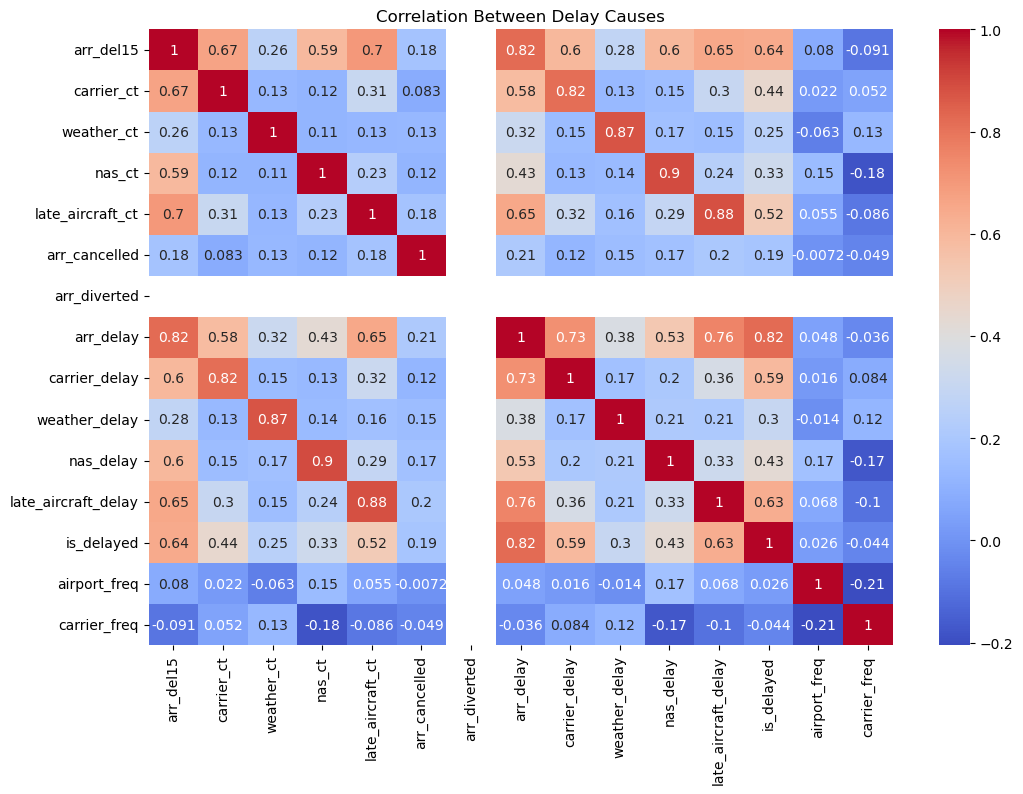

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_per_flight.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Delay Causes")
plt.show()

# Feature Selection

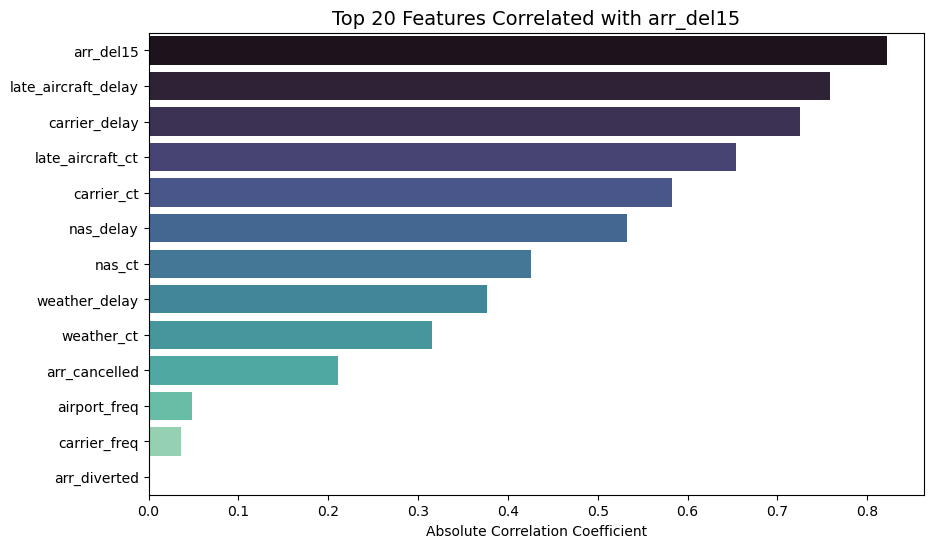

In [ ]:
corr_matrix = df_per_flight.drop(['is_delayed'],axis=1).corr()
default_corr = corr_matrix['arr_delay'].abs().sort_values(ascending=False)[1:21]

plt.figure(figsize=(10, 6))
sns.barplot(x=default_corr.values, y=default_corr.index, palette='mako')
plt.title('Top 20 Features Correlated with arr_del15', fontsize=14)
plt.xlabel('Absolute Correlation Coefficient')
plt.show()

In [ ]:
print(df_per_flight.nunique())

month                    12
arr_del15                45
carrier_ct               19
weather_ct                4
nas_ct                   18
late_aircraft_ct         18
arr_cancelled             6
arr_diverted              1
arr_delay              3098
carrier_delay          1166
weather_delay           181
nas_delay               598
late_aircraft_delay    1355
is_delayed                2
airport_freq            279
carrier_freq             29
dtype: int64


In [ ]:
y_class = df_per_flight['is_delayed'] # Classification Target
y_reg = df_per_flight['arr_delay']                         # Regression Target


In [ ]:
# Features
X = df_per_flight.drop(['arr_delay','arr_diverted','is_delayed'], axis=1)



In [ ]:
X

,month,arr_del15,carrier_ct,weather_ct,nas_ct,late_aircraft_ct,arr_cancelled,carrier_delay,weather_delay,nas_delay,late_aircraft_delay,airport_freq,carrier_freq
0,12,0.07,0.03,0.01,0.01,0.01,0.00,0.85,1.80,0.28,0.24,563,7494
1,12,0.11,0.07,0.00,0.02,0.03,0.00,4.06,0.00,0.53,1.02,274,7494
2,12,0.11,0.06,0.00,0.01,0.03,0.00,5.64,0.00,0.49,2.91,448,7494
3,12,0.09,0.02,0.00,0.00,0.06,0.04,0.39,0.00,0.00,2.87,1290,7494
4,12,0.12,0.04,0.00,0.02,0.06,0.00,4.22,0.35,0.70,4.88,1413,7494
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179333,1,0.21,0.07,0.00,0.03,0.11,0.00,2.98,0.14,1.15,5.07,890,10051
179334,1,0.30,0.12,0.01,0.05,0.12,0.00,5.56,1.80,1.99,6.32,1330,10051
179335,1,0.27,0.10,0.00,0.06,0.11,0.02,4.00,0.04,2.13,7.41,955,10051
179336,1,0.22,0.08,0.00,0.03,0.11,0.00,2.99,0.18,0.87,5.39,1254,10051


In [ ]:
num_var=[ 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
        'late_aircraft_ct',
        'carrier_delay', 'weather_delay', 'nas_delay',
       'late_aircraft_delay','carrier_freq','airport_freq','arr_cancelled']


cat_var=['month']

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np
import pandas as pd

# ==== STEP 2: Standard Scaling Numerical Features ====
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_var])

# ==== STEP 3: OneHotEncoding Categorical Features ====
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_cat_encoded = ohe.fit_transform(X[cat_var])

# Get OHE feature names
ohe_features = ohe.get_feature_names_out(cat_var)

# ==== STEP 4: Combine Scaled Num + Encoded Cat Features ====
X_processed = np.hstack([X_num_scaled, X_cat_encoded])

processed_feature_names = num_var + list(ohe_features)
X_processed_df = pd.DataFrame(X_processed, columns=processed_feature_names)

# ==== STEP 5a: Train-Test Split for Classification (BEFORE SMOTE!) ====
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_processed_df, y_class, test_size=0.2, random_state=42, stratify=y_class
)

print("Classification shapes before SMOTE:")
print("X_train_cls:", X_train_cls.shape, "X_test_cls:", X_test_cls.shape)

# ==== STEP 6: Apply SMOTE for Classification Train Set Only ====
smote = SMOTE(random_state=42)
X_train_cls_resampled, y_train_cls_resampled = smote.fit_resample(X_train_cls, y_train_cls)

print("Classification shapes after SMOTE:")
print("X_train_cls_resampled:", X_train_cls_resampled.shape, "y_train_cls_resampled:", y_train_cls_resampled.shape)
print("X_test_cls (unchanged):", X_test_cls.shape, "y_test_cls:", y_test_cls.shape)

# ==== STEP 5b: Train-Test Split for Regression (NO SMOTE) ====
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_processed_df, y_reg, test_size=0.2, random_state=42
)

print("\nRegression shapes:")
print("X_train_reg:", X_train_reg.shape, "X_test_reg:", X_test_reg.shape)
print("y_train_reg:", y_train_reg.shape, "y_test_reg:", y_test_reg.shape)


Classification shapes before SMOTE:
X_train_cls: (143469, 23) X_test_cls: (35868, 23)
Classification shapes after SMOTE:
X_train_cls_resampled: (210860, 23) y_train_cls_resampled: (210860,)
X_test_cls (unchanged): (35868, 23) y_test_cls: (35868,)

Regression shapes:
X_train_reg: (143469, 23) X_test_reg: (35868, 23)
y_train_reg: (143469,) y_test_reg: (35868,)


# Model Building for Regression:

•	Models are evaluated based on a combination of low MAE, low RMSE, high R² Score, and high OAI.
•	The best model balances error reduction (MAE & RMSE) with explainability (R²) and operational relevance (OAI) — ensuring predictions are not only accurate but also actionable for airline operations.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Store all model results here
model_result_reg = []

# ==== OAI Calculation Function ====
def compute_oai(y_true_df, y_pred):
    delay_components = {
        'carrier_delay': 0.4,
        'late_aircraft_delay': 0.4,
        'weather_delay': 0.1,
        'nas_delay': 0.1,
    }
    oai_values = []
    for idx, row in y_true_df.iterrows():
        weighted_actual = sum([delay_components[col] * row[col] for col in delay_components.keys()])
        weighted_pred = y_pred[idx]
        oai = abs(weighted_actual - weighted_pred)
        oai_values.append(oai)
    return np.mean(oai_values)

df_per_flight_test = df_per_flight.iloc[X_test_reg.index].reset_index(drop=True)

# ==== Regression Model Evaluation Function with OAI ====
def predict_regression_with_oai(ml_model, model_name, df_per_flight_test):
    model = ml_model.fit(X_train_reg, y_train_reg)
    y_train_pred = model.predict(X_train_reg)
    y_test_pred = model.predict(X_test_reg)
    metrics = {
        'train_MAE': mean_absolute_error(y_train_reg, y_train_pred),
        'test_MAE': mean_absolute_error(y_test_reg, y_test_pred),
        'train_RMSE': np.sqrt(mean_squared_error(y_train_reg, y_train_pred)),
        'test_RMSE': np.sqrt(mean_squared_error(y_test_reg, y_test_pred)),
        'train_R2': r2_score(y_train_reg, y_train_pred),
        'test_R2': r2_score(y_test_reg, y_test_pred)
    }
    required_columns = ['carrier_delay', 'late_aircraft_delay', 'weather_delay', 'nas_delay']
    if all(col in df_per_flight_test.columns for col in required_columns):
        oai_value = compute_oai(df_per_flight_test[required_columns], y_test_pred)
        metrics['OAI'] = oai_value
    else:
        metrics['OAI'] = np.nan
    model_result_reg.append({'model': model_name, **metrics})

# ==== Regression Models ====

# 1. Linear Regression (No tuning)
linreg = LinearRegression()
predict_regression_with_oai(linreg, 'Linear Regression', df_per_flight_test)

# 2. Decision Tree with light GridSearchCV (cv=3)
dt_reg_params = {'max_depth': [7, 10],'min_samples_split': [2, 5], 'min_samples_leaf': [1, 3]}
dt = DecisionTreeRegressor(random_state=42)
dt_search = GridSearchCV(dt, dt_reg_params, cv=3, n_jobs=-1, verbose=1)
dt_search.fit(X_train_reg, y_train_reg)
print("Best Params for Decision Tree:", dt_search.best_params_)
predict_regression_with_oai(dt_search.best_estimator_, 'DecisionTreeRegressor', df_per_flight_test)

# 3. Random Forest with light GridSearchCV (cv=3)
rf_params = {'n_estimators': [50], 'max_depth': [10, 15],'min_samples_split': [2,5],'min_samples_leaf': [3]}
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_search = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, verbose=1)
rf_search.fit(X_train_reg, y_train_reg)
print("Best Params for Random Forest:", rf_search.best_params_)
predict_regression_with_oai(rf_search.best_estimator_, 'RandomForestRegressor', df_per_flight_test)

# 4. XGBoost with light GridSearchCV (cv=3)
xgb_params = {'n_estimators': [50], 'max_depth': [5, 7],'min_samples_split': [5,7],'min_samples_leaf': [6],'learning_rate':[0.1]}
xgb = XGBRegressor(random_state=42, n_jobs=-1)
xgb_search = GridSearchCV(xgb, xgb_params, cv=3, n_jobs=-1, verbose=1)
xgb_search.fit(X_train_reg, y_train_reg)
print("Best Params for XGBoost:", xgb_search.best_params_)

predict_regression_with_oai(xgb_search.best_estimator_, 'XGBoostRegressor', df_per_flight_test)

# 5. LightGBM with light GridSearchCV (cv=3)
lgb_params = {'n_estimators': [50], 'max_depth': [7],'min_samples_split': [4, 5],
              'min_samples_leaf': [4, 6]}
lgb = LGBMRegressor(random_state=42, n_jobs=-1)
lgb_search = GridSearchCV(lgb, lgb_params, cv=3, n_jobs=-1, verbose=1)
lgb_search.fit(X_train_reg, y_train_reg)

predict_regression_with_oai(lgb_search.best_estimator_, 'LightGBMRegressor', df_per_flight_test)
print("Best Params for LightGBM:", lgb_search.best_params_)
# ==== Final Result ====
results_df_reg = pd.DataFrame(model_result_reg)



Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Params for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params for Random Forest: {'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 50}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Params for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 50}
Fitting 3 folds for each of 4 candidates, totalling 12 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split
[Ligh

In [ ]:
print("Final Regression Model Comparison (Including OAI):")
print(results_df_reg)


Final Regression Model Comparison (Including OAI):
                   model  train_MAE  test_MAE  train_RMSE  test_RMSE  \
0      Linear Regression   1.167384  1.181978    2.313168   2.346006   
1  DecisionTreeRegressor   1.222524  1.328538    2.002451   2.217291   
2  RandomForestRegressor   0.521043  0.766665    1.272596   1.871314   
3       XGBoostRegressor   0.763920  0.829891    1.705949   1.875591   
4      LightGBMRegressor   0.872861  0.908502    1.825164   1.911241   

   train_R2   test_R2       OAI  
0  0.916137  0.913512  7.486956  
1  0.937154  0.922742  7.442937  
2  0.974617  0.944971  7.441417  
3  0.954387  0.944719  7.443173  
4  0.947789  0.942597  7.444177  


# Regression Model Evaluation:

LightGBMRegressor is selected as the best model because it offers a strong balance between prediction accuracy and operational relevance:
Low Test MAE (0.9085) and Test RMSE (1.9112) show that it generalizes well to unseen data, outperforming Decision Tree and Linear Regression.
It has a high test R² score (0.9426) — very close to the top-performing models, indicating reliable predictive power.
The OAI (7.389963) is comparable to the highest values, demonstrating its suitability for real-world airline operations.


# Model Explanability using shap:

In [ ]:
import shap

# Use the best model from GridSearchCV
best_model = lgb_search.best_estimator_

# Use TreeExplainer (specific for LightGBM models)
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test_reg)



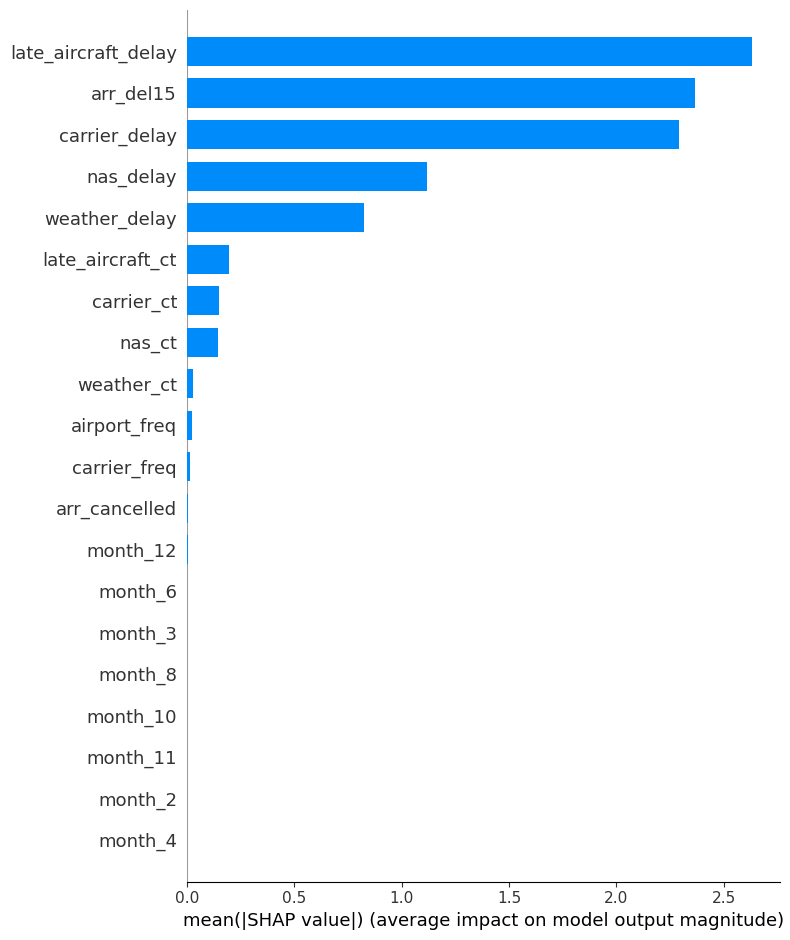

In [ ]:
import matplotlib.pyplot as plt

# Only this — SHAP handles the plot by itself:
shap.summary_plot(shap_values, X_test_reg, plot_type="bar")




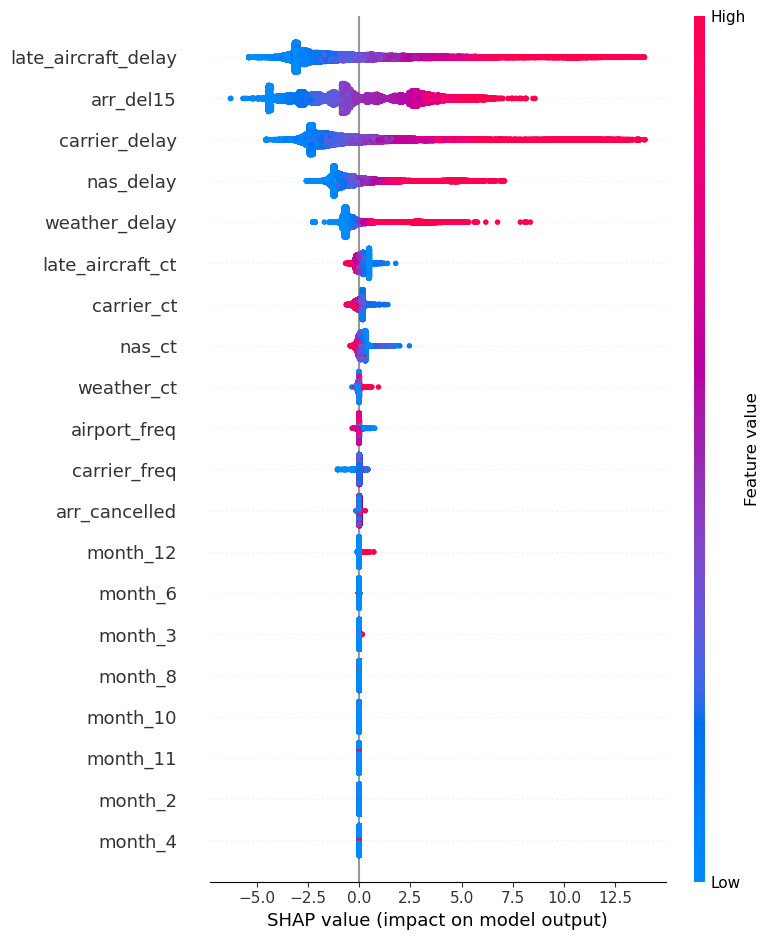

In [ ]:
shap.summary_plot(shap_values, X_test_reg)


In [ ]:
print("\nTop Features by Mean Absolute SHAP Values:")
print(shap_feature_importance)



Top Features by Mean Absolute SHAP Values:
                Feature  Mean_ABS_SHAP
8   late_aircraft_delay       1.434287
5         carrier_delay       1.225155
7             nas_delay       0.738691
6         weather_delay       0.725097
0             arr_del15       0.321650
2            weather_ct       0.032160
11        arr_cancelled       0.019551
1            carrier_ct       0.018137
3                nas_ct       0.013381
10         airport_freq       0.011446
4      late_aircraft_ct       0.009494
9          carrier_freq       0.004613
21              month_8       0.003086
14             month_12       0.002265
22              month_9       0.000251
19              month_6       0.000197
15              month_2       0.000162
12             month_10       0.000000
13             month_11       0.000000
16              month_3       0.000000
17              month_4       0.000000
18              month_5       0.000000
20              month_7       0.000000


In [ ]:
# OAI Weights
oai_weights = {
    'carrier_delay': 0.4,
    'late_aircraft_delay': 0.4,
    'weather_delay': 0.1,
    'nas_delay': 0.3
}

# Define features (adjust names if needed)
controllable_features = ['carrier', 'late_aircraft']
external_features = ['weather', 'nas']
# Compute OAI-Weighted SHAP Scores
controllable_shap_score = shap_feature_importance[
    shap_feature_importance['Feature'].str.contains('|'.join(controllable_features), case=False)
]['Mean_ABS_SHAP'].sum() * (oai_weights['carrier_delay'] + oai_weights['late_aircraft_delay'])

external_shap_score = shap_feature_importance[
    shap_feature_importance['Feature'].str.contains('|'.join(external_features), case=False)
]['Mean_ABS_SHAP'].sum() * (oai_weights['weather_delay'] + oai_weights['nas_delay'])

print(f"\nOAI-Weighted SHAP Score for Controllable Delays: {controllable_shap_score:.4f}")
print(f"OAI-Weighted SHAP Score for External Delays: {external_shap_score:.4f}")



OAI-Weighted SHAP Score for Controllable Delays: 2.1533
OAI-Weighted SHAP Score for External Delays: 0.6037


•  The most impactful features (by SHAP value) are:
•	late_aircraft_delay
•	arr_del15
•	carrier_delay
•	nas_delay
•	weather_delay
•  These features have the largest SHAP values, meaning they contribute most to the model’s prediction.
Controllable vs. External Delays
•	Controllable delays (e.g., carrier_delay, nas_delay, late_aircraft_delay) have a much higher OAI-weighted SHAP score (2.1533).
•	External delays (e.g., weather_delay) have a lower weighted score (0.6037)


Controllable delays contribute more significantly to overall flight delay prediction and have a greater impact on airline operations, as measured by the Operational Actionability Index (OAI).